In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
from get_data import get_data
from rap import get_predictions
from evaluate import calculate_error, explained_variance, compute_profit

In [2]:
def plot_real_predicted(real, predicted, dates, r, number_of_neighbors, stock_name):
    plt.plot(dates, real)
    plt.plot(dates, predicted)
    plt.legend(["Real Price", "Predicted"])
    plt.title(f'Stock Price Change from {str(dates[0])} to {str(dates[-1])} for {stock_name} with r={r} and k={number_of_neighbors}')
    plt.show()

/Users/nurpeiis/miniconda3/envs/stock_prediction/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/nurpeiis/miniconda3/envs/stock_prediction/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Error {'MFE': -16.55249053955078, 'MAE': 25.25850311279297, 'MSE': 861.2667491917033, 'RMSE': 29.347346544307943}
Explained Variance Score -0.012731357186139602
Profit 31.291259765625


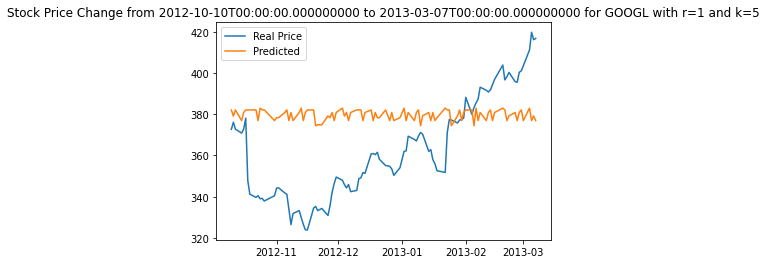

Error {'MFE': -22.11241729736328, 'MAE': 28.629131774902344, 'MSE': 1093.4530301594268, 'RMSE': 33.06740132153458}
Explained Variance Score -0.04241278116895919
Profit 13.773895263671875


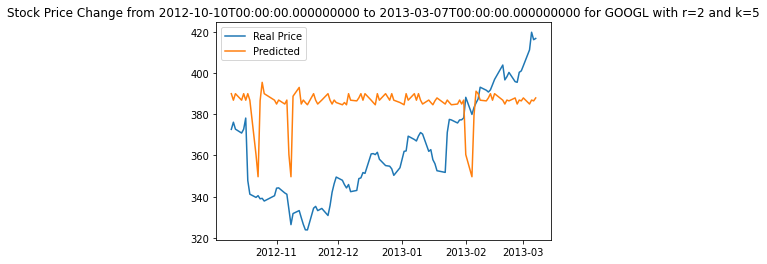

Error {'MFE': -16.209361267089843, 'MAE': 25.36301483154297, 'MSE': 941.8036303974222, 'RMSE': 30.688819306017987}
Explained Variance Score -0.17099761812748482
Profit 36.7967529296875


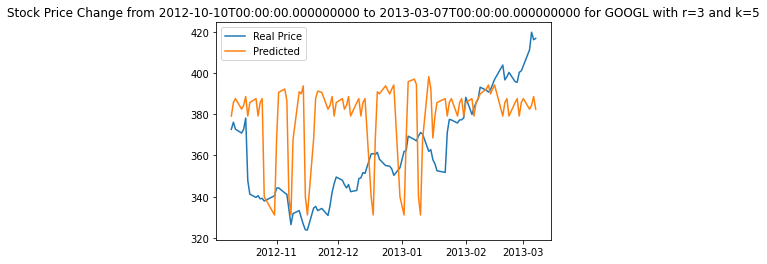

Error {'MFE': -11.675018005371093, 'MAE': 25.79924591064453, 'MSE': 978.5430509755108, 'RMSE': 31.281672764983504}
Explained Variance Score -0.45238591899152514
Profit 28.6136474609375


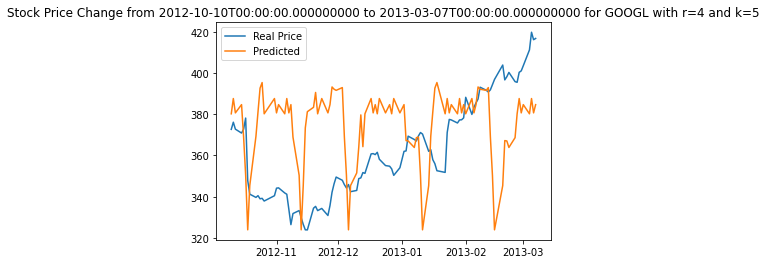

Error {'MFE': -22.6099072265625, 'MAE': 34.360258178710936, 'MSE': 1473.2695637956076, 'RMSE': 38.3831937675281}
Explained Variance Score -0.6590161647241142
Profit 3.983856201171875


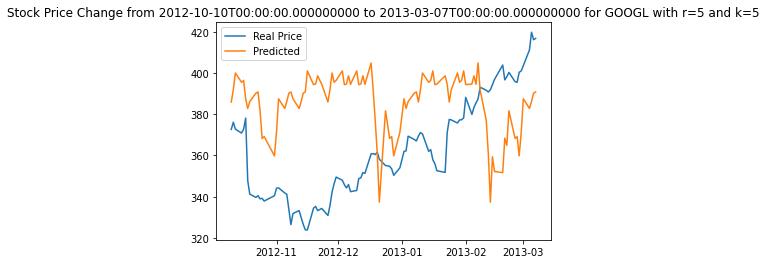

Error {'MFE': -15.700500183105468, 'MAE': 26.155658264160156, 'MSE': 1063.5427013007459, 'RMSE': 32.612002411700296}
Explained Variance Score -0.40893005110337266
Profit -15.755706787109375


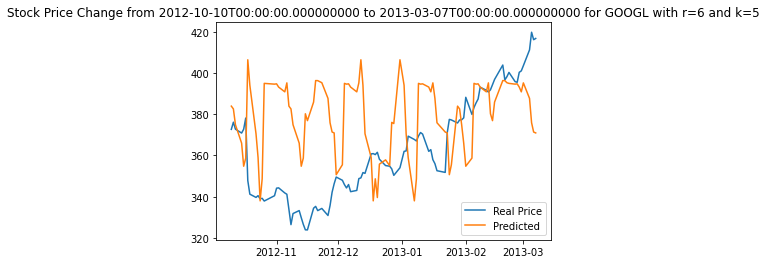

Error {'MFE': -10.02987579345703, 'MAE': 20.332684631347657, 'MSE': 628.0819213664253, 'RMSE': 25.061562628184724}
Explained Variance Score 0.09038712186980058
Profit 19.289276123046875


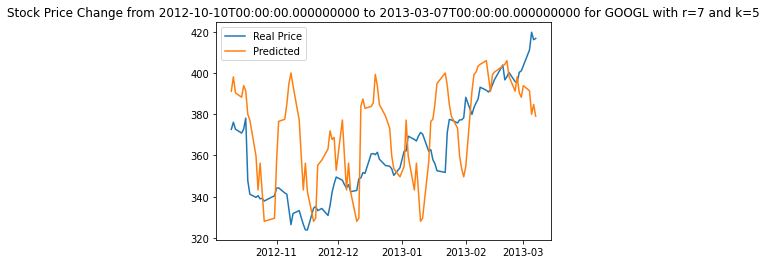

Error {'MFE': -13.281831970214844, 'MAE': 25.50265167236328, 'MSE': 1104.620760742603, 'RMSE': 33.235835490364956}
Explained Variance Score -0.6006474414991314
Profit 57.4173583984375


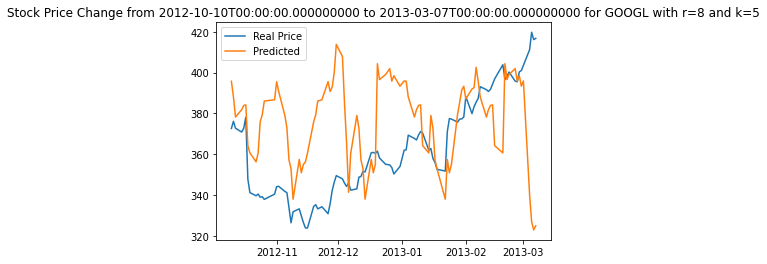

Error {'MFE': -1.7509527587890625, 'MAE': 26.70160400390625, 'MSE': 1094.6181112654879, 'RMSE': 33.08501339376316}
Explained Variance Score -0.8823147696269447
Profit 40.495452880859375


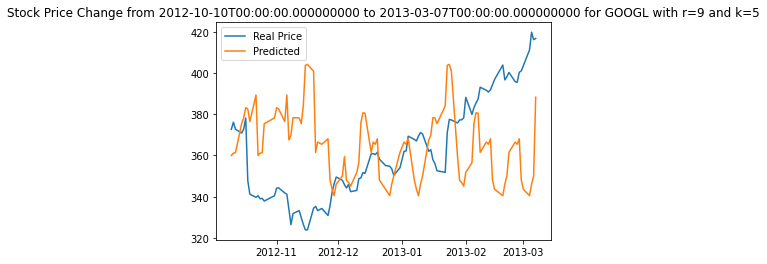

Error {'MFE': -23.030280151367187, 'MAE': 31.459811401367187, 'MSE': 1486.8126467780023, 'RMSE': 38.5592096233572}
Explained Variance Score -0.6492854754338453
Profit 14.689697265625


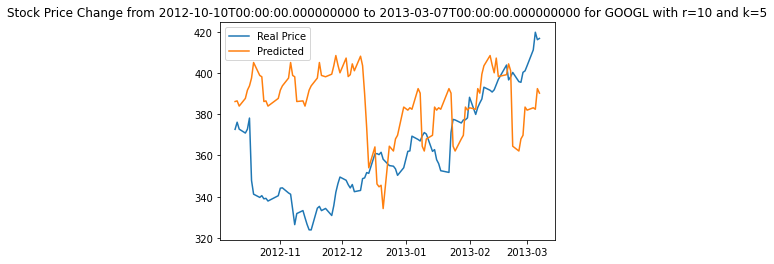

Error {'MFE': -6.833685607910156, 'MAE': 28.09033966064453, 'MSE': 1389.3538664076757, 'RMSE': 37.27403743100116}
Explained Variance Score -1.3153252980292423
Profit 46.06610107421875


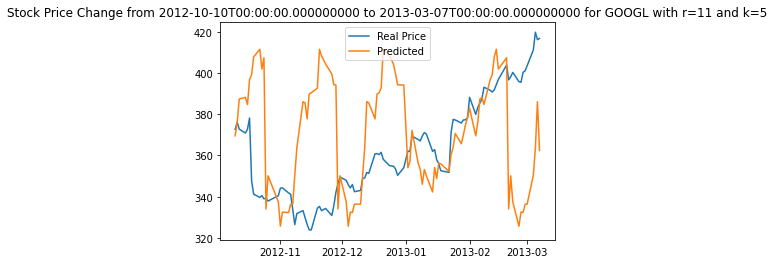

Error {'MFE': 21.54473907470703, 'MAE': 32.18397979736328, 'MSE': 1428.8089932330047, 'RMSE': 37.79958985535431}
Explained Variance Score -0.6634506487475071
Profit 27.502410888671875


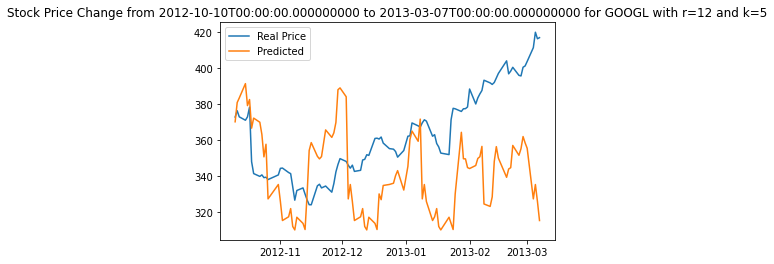

Error {'MFE': 2.187131652832031, 'MAE': 22.419971618652344, 'MSE': 905.1979209225718, 'RMSE': 30.0865072901886}
Explained Variance Score -0.5527092165551173
Profit 86.68154907226562


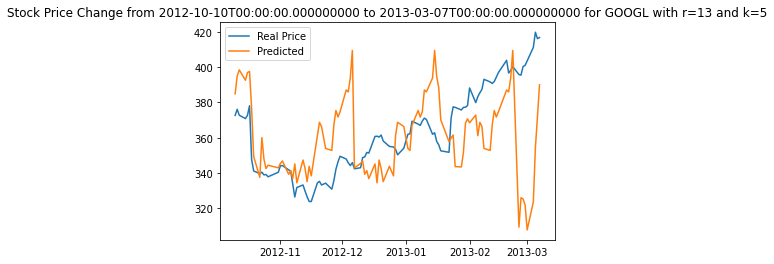

Error {'MFE': 13.233177795410157, 'MAE': 33.23348175048828, 'MSE': 1412.3637281728816, 'RMSE': 37.58142796878375}
Explained Variance Score -1.1335559021625619
Profit 9.9749755859375


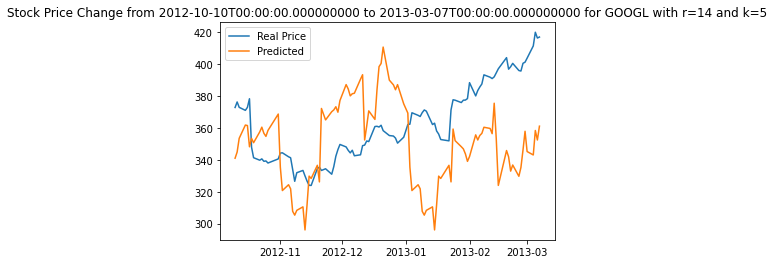

Error {'MFE': 19.205101013183594, 'MAE': 30.667767028808594, 'MSE': 1802.0155924050975, 'RMSE': 42.45015420943836}
Explained Variance Score -1.471430231351261
Profit 69.04400634765625


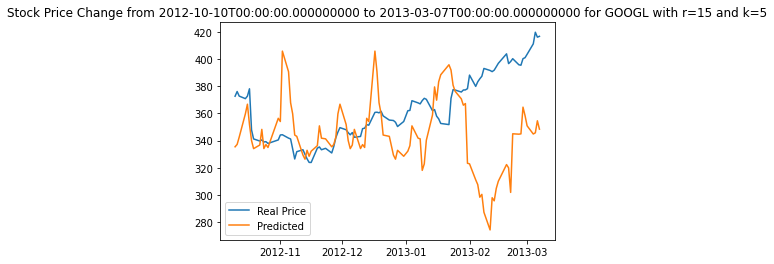

Error {'MFE': 8.168866577148437, 'MAE': 28.84995056152344, 'MSE': 1155.408045795057, 'RMSE': 33.99129367639686}
Explained Variance Score -0.8773576796371125
Profit -3.423492431640625


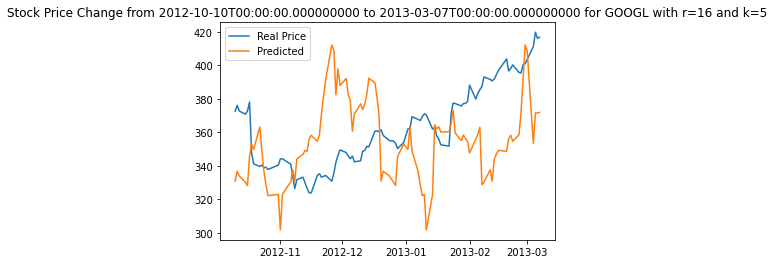

Error {'MFE': 16.382078552246092, 'MAE': 31.292093200683595, 'MSE': 1471.0724389005359, 'RMSE': 38.35456216541307}
Explained Variance Score -1.0739820832772025
Profit 1.53643798828125


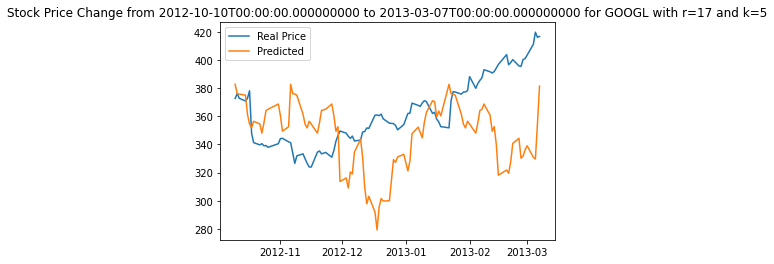

Error {'MFE': 26.025623626708985, 'MAE': 37.36036117553711, 'MSE': 2055.7673404662987, 'RMSE': 45.34057057940822}
Explained Variance Score -1.3770251003835963
Profit 25.370391845703125


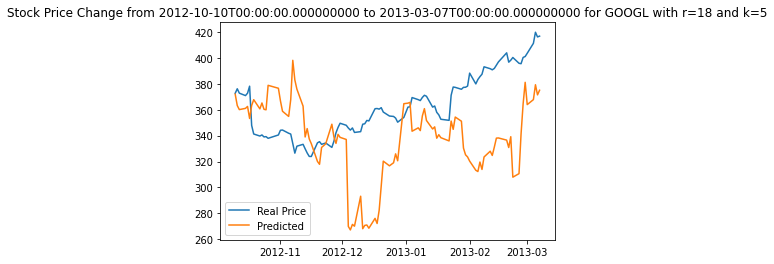

Error {'MFE': 35.6725212097168, 'MAE': 42.583934173583984, 'MSE': 2545.815980529485, 'RMSE': 50.4560797182013}
Explained Variance Score -1.1957054890808565
Profit 27.757720947265625


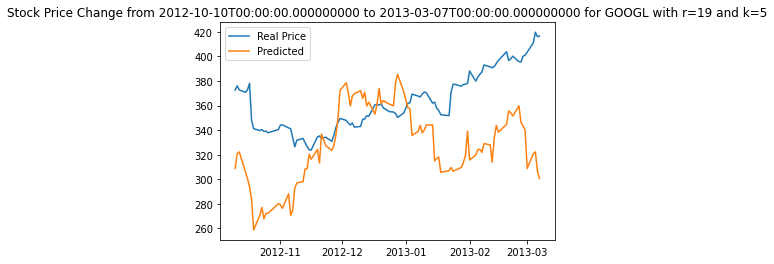

Error {'MFE': 19.190787963867187, 'MAE': 31.041240844726563, 'MSE': 1453.1073817558029, 'RMSE': 38.11964561424729}
Explained Variance Score -0.8707071660423469
Profit 19.6846923828125


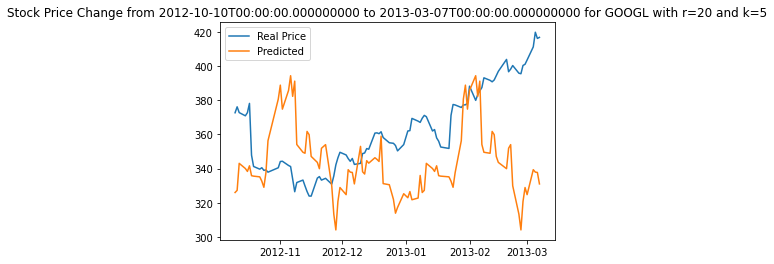

Error {'MFE': 30.297096405029297, 'MAE': 40.676974334716796, 'MSE': 2176.9446821507554, 'RMSE': 46.657739788279024}
Explained Variance Score -1.1711208945100728
Profit 60.04498291015625


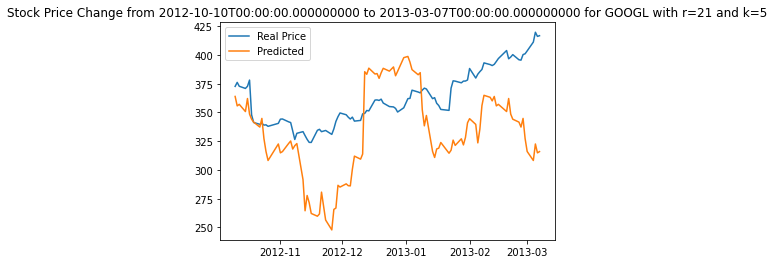

Error {'MFE': 14.208452911376954, 'MAE': 23.77552444458008, 'MSE': 886.5265392029588, 'RMSE': 29.774595533826464}
Explained Variance Score -0.1806306201899317
Profit 67.70770263671875


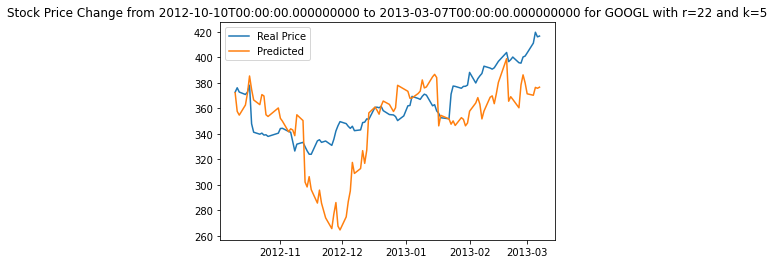

Error {'MFE': -9.599006652832031, 'MAE': 24.996797790527342, 'MSE': 938.0026445667539, 'RMSE': 30.626828836279376}
Explained Variance Score -0.45863650897920527
Profit 93.09811401367188


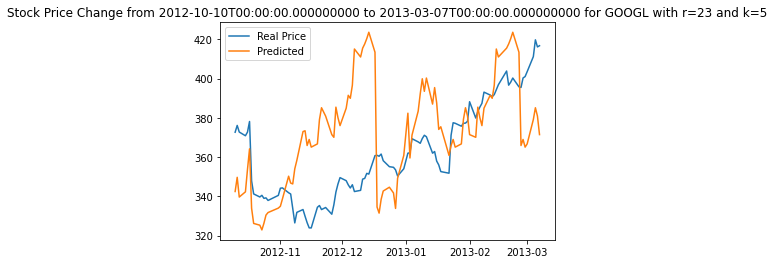

Error {'MFE': 39.407305603027346, 'MAE': 53.07077056884766, 'MSE': 4465.378247515713, 'RMSE': 66.82348574801911}
Explained Variance Score -4.022327999525719
Profit 23.208160400390625


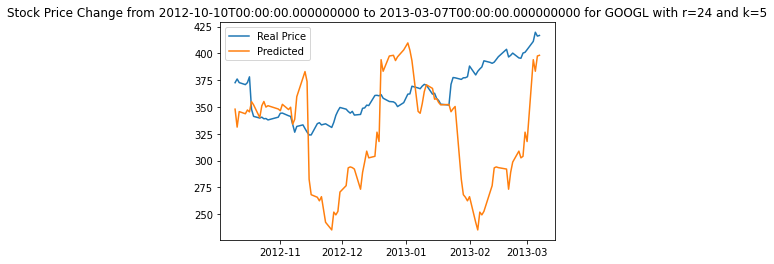

Error {'MFE': 11.593240509033203, 'MAE': 41.69904739379883, 'MSE': 2357.439208023206, 'RMSE': 48.55346751801776}
Explained Variance Score -2.8334888364590816
Profit 19.95501708984375


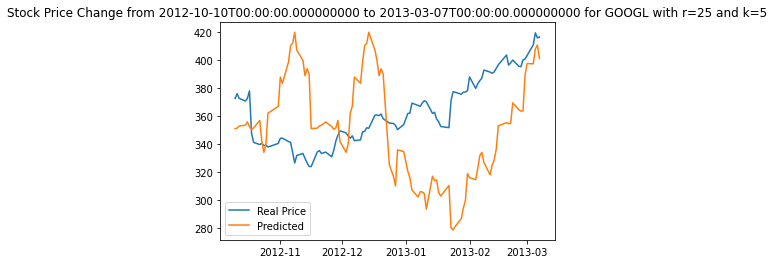

Error {'MFE': 29.95130432128906, 'MAE': 40.95721069335937, 'MSE': 2383.488195157852, 'RMSE': 48.82098109581425}
Explained Variance Score -1.5632184319838491
Profit 10.705657958984375


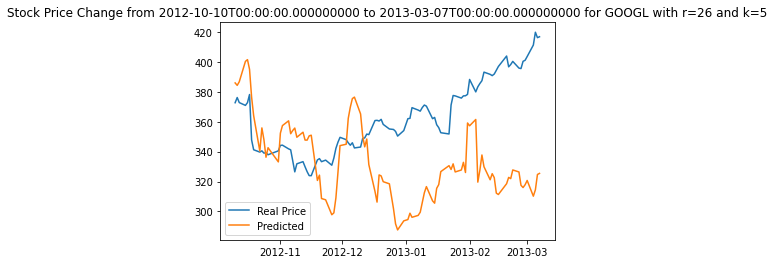

Error {'MFE': 37.181034545898434, 'MAE': 38.12898254394531, 'MSE': 2069.6022953922115, 'RMSE': 45.492881810149285}
Explained Variance Score -0.18498751825358428
Profit 30.875885009765625


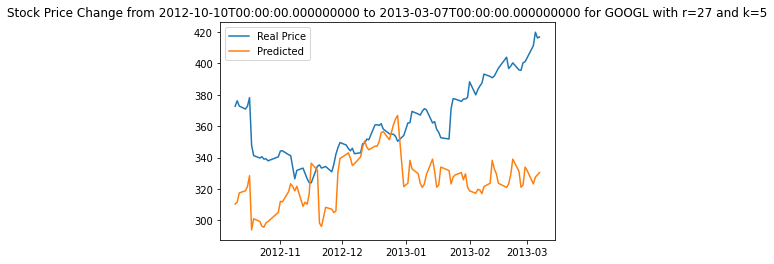

Error {'MFE': 20.271268615722658, 'MAE': 30.469667663574217, 'MSE': 1204.4377754235547, 'RMSE': 34.70501081145999}
Explained Variance Score -0.3683651337981979
Profit 56.731689453125


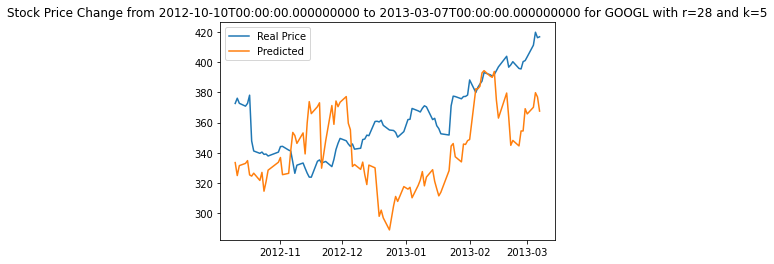

Error {'MFE': 40.372973937988284, 'MAE': 40.60960906982422, 'MSE': 2025.6001787030232, 'RMSE': 45.00666815820766}
Explained Variance Score 0.31777220133561557
Profit 45.034912109375


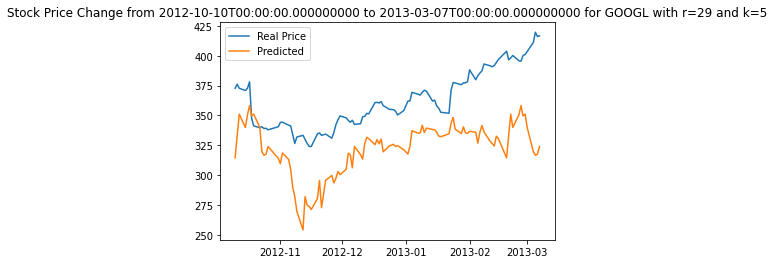

Error {'MFE': 27.903502807617187, 'MAE': 30.582581176757813, 'MSE': 1163.6408087552152, 'RMSE': 34.112179771383936}
Explained Variance Score 0.3360302359258116
Profit 27.25732421875


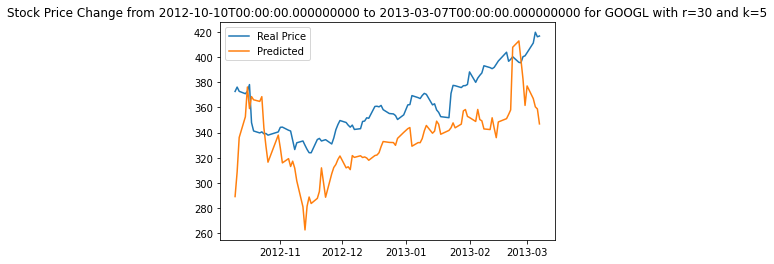

Error {'MFE': 29.398295288085937, 'MAE': 65.67087280273438, 'MSE': 5720.828220060794, 'RMSE': 75.6361568303202}
Explained Variance Score -7.3748536231989466
Profit 24.129180908203125


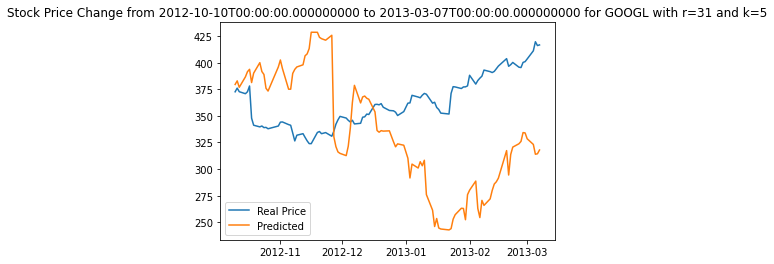

Error {'MFE': 28.05830810546875, 'MAE': 38.51976989746094, 'MSE': 2627.2988183829652, 'RMSE': 51.257183090596826}
Explained Variance Score -2.1730188581545535
Profit 25.175323486328125


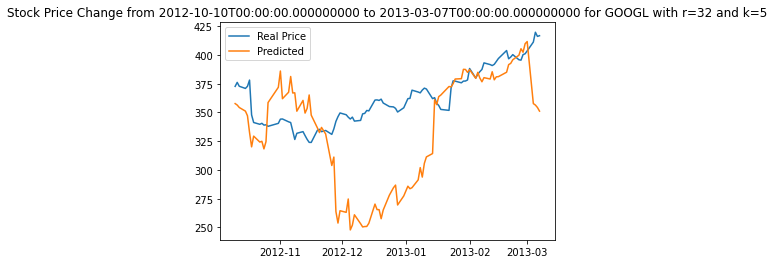

Error {'MFE': -0.665517578125, 'MAE': 37.41456604003906, 'MSE': 2089.3763331251594, 'RMSE': 45.70969627032277}
Explained Variance Score -2.602237213717281
Profit 41.741668701171875


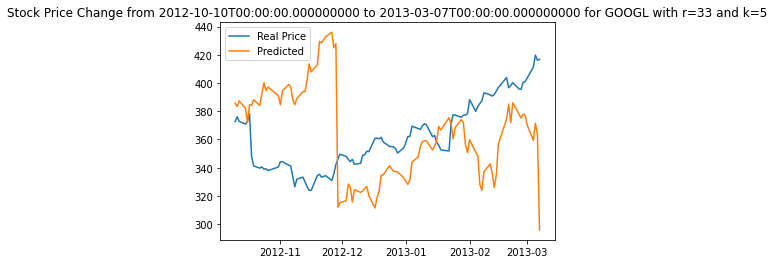

Error {'MFE': 56.77232177734375, 'MAE': 59.50945861816406, 'MSE': 5718.867005675435, 'RMSE': 75.62319092497641}
Explained Variance Score -3.3038027141513213
Profit 8.633575439453125


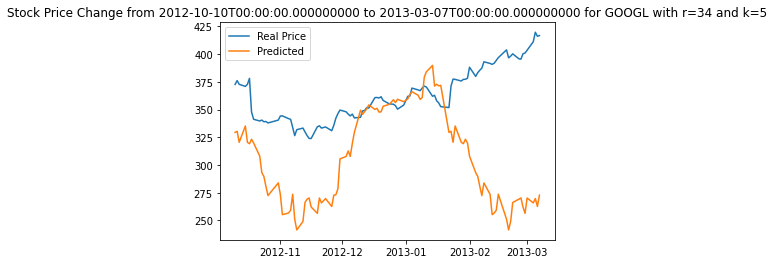

Error {'MFE': 44.94279663085938, 'MAE': 44.94279663085938, 'MSE': 2540.964280372616, 'RMSE': 50.40797834046329}
Explained Variance Score 0.10137904045800428
Profit 46.211334228515625


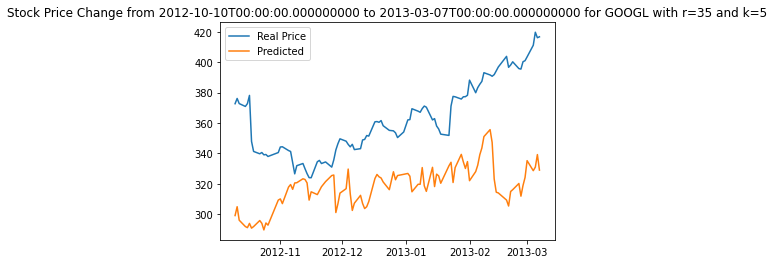

Error {'MFE': 49.32407440185547, 'MAE': 49.32407440185547, 'MSE': 3076.5722963373455, 'RMSE': 55.466857638930165}
Explained Variance Score -0.11003482512081186
Profit 11.316131591796875


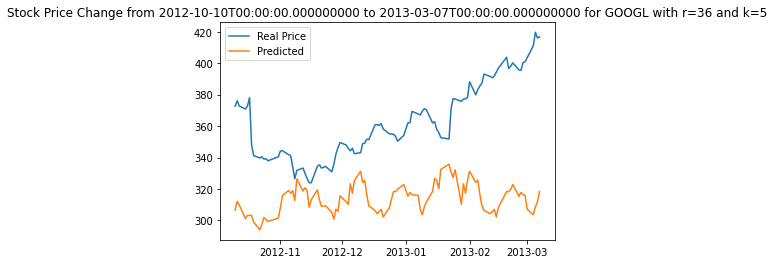

Error {'MFE': 13.070521545410156, 'MAE': 27.803155822753908, 'MSE': 1059.599283465622, 'RMSE': 32.55148665523008}
Explained Variance Score -0.5326132551072231
Profit -3.318328857421875


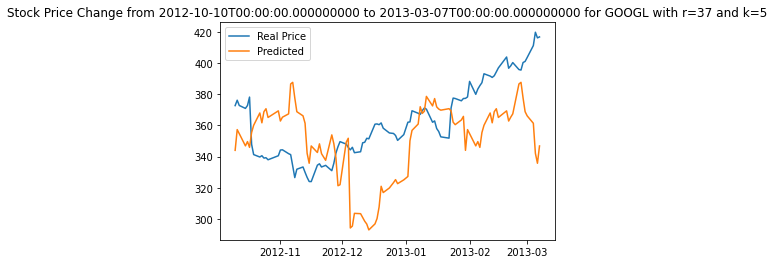

Error {'MFE': 61.729329681396486, 'MAE': 61.729329681396486, 'MSE': 4965.556299794924, 'RMSE': 70.4667034832404}
Explained Variance Score -0.9918060628828715
Profit 39.474456787109375


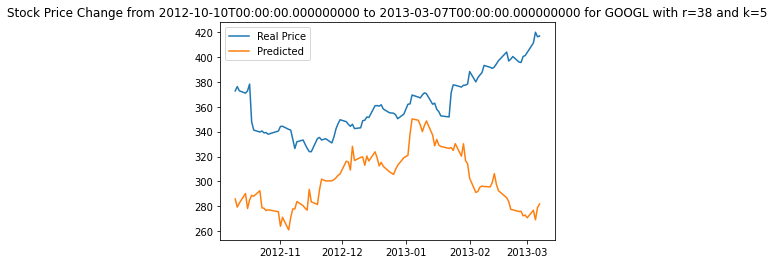

Error {'MFE': 45.47693084716797, 'MAE': 50.816370544433596, 'MSE': 3751.103175085159, 'RMSE': 61.246250294080525}
Explained Variance Score -1.9021471127478975
Profit -8.68365478515625


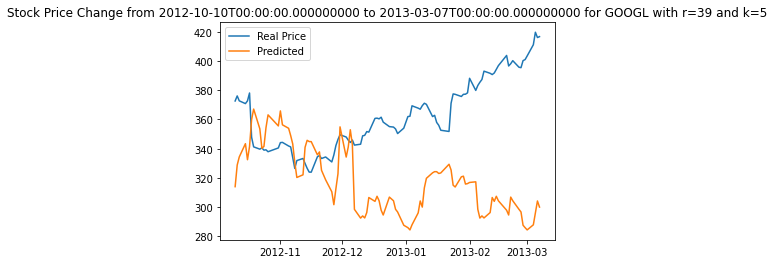

Error {'MFE': 64.58028182983398, 'MAE': 64.62752914428711, 'MSE': 5878.876809882752, 'RMSE': 76.67383393233152}
Explained Variance Score -1.9457962257086314
Profit 50.075042724609375


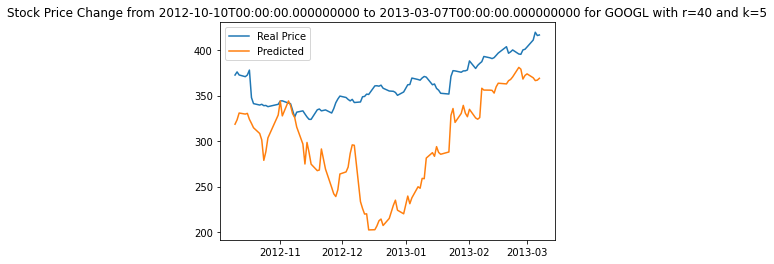

Error {'MFE': 18.82242218017578, 'MAE': 30.675376892089844, 'MSE': 1628.0015840595868, 'RMSE': 40.3485016333889}
Explained Variance Score -1.196448370735827
Profit 13.53350830078125


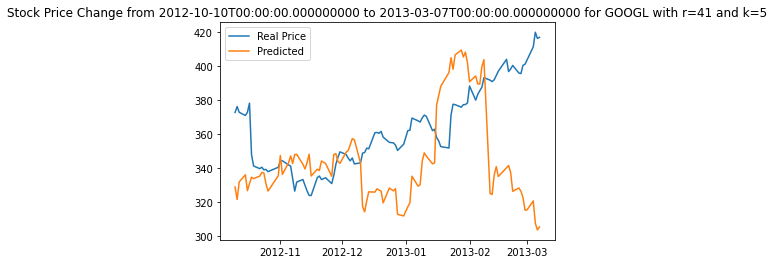

Error {'MFE': 55.997698364257815, 'MAE': 56.01851989746094, 'MSE': 4305.460225535985, 'RMSE': 65.61600586393524}
Explained Variance Score -1.0171067599677448
Profit 14.139129638671875


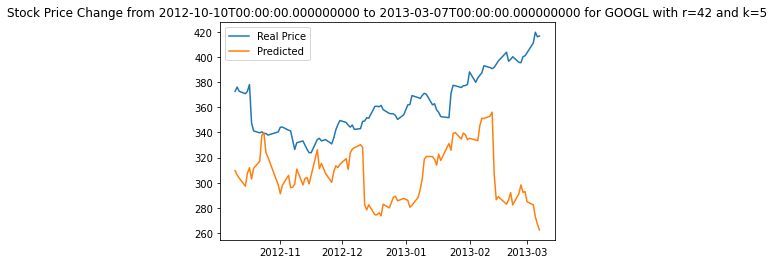

Error {'MFE': 58.714115905761716, 'MAE': 58.714115905761716, 'MSE': 4504.655135594709, 'RMSE': 67.11672768836922}
Explained Variance Score -0.8232621548579258
Profit 44.589599609375


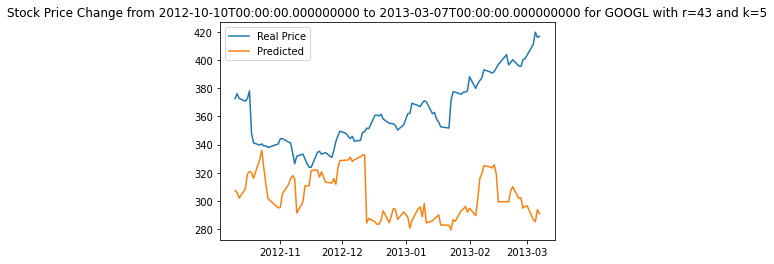

Error {'MFE': 67.06161285400391, 'MAE': 67.06161285400391, 'MSE': 5731.259797877232, 'RMSE': 75.70508435948824}
Explained Variance Score -1.127956901582841
Profit 50.010040283203125


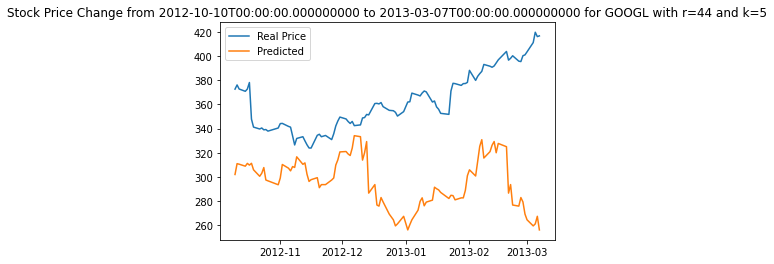

Error {'MFE': 70.41631622314453, 'MAE': 83.60540618896485, 'MSE': 10888.944415471256, 'RMSE': 104.35010500939256}
Explained Variance Score -9.226759808328346
Profit 45.9560546875


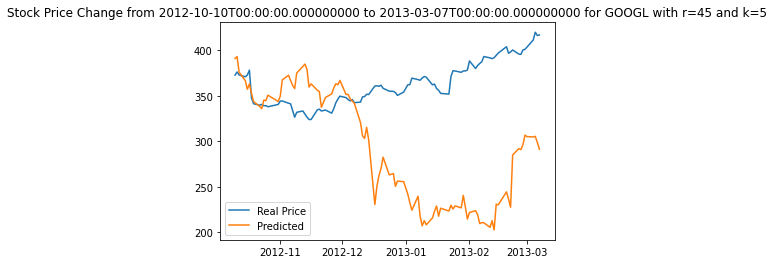

Error {'MFE': 47.54634643554687, 'MAE': 48.509909057617186, 'MSE': 3449.3488575540855, 'RMSE': 58.73115746819643}
Explained Variance Score -1.0498293510026602
Profit -9.66973876953125


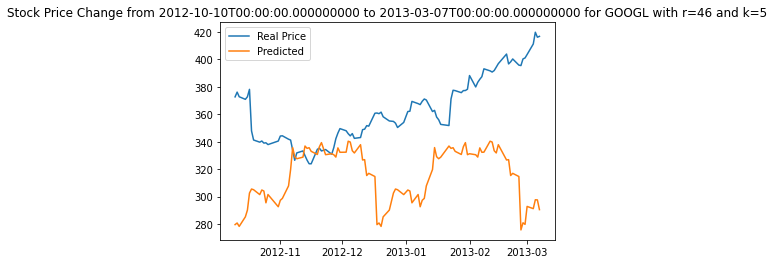

Error {'MFE': 70.72007080078124, 'MAE': 70.72007080078124, 'MSE': 5651.8657340388745, 'RMSE': 75.1788915456917}
Explained Variance Score -0.12181160062914809
Profit 24.964935302734375


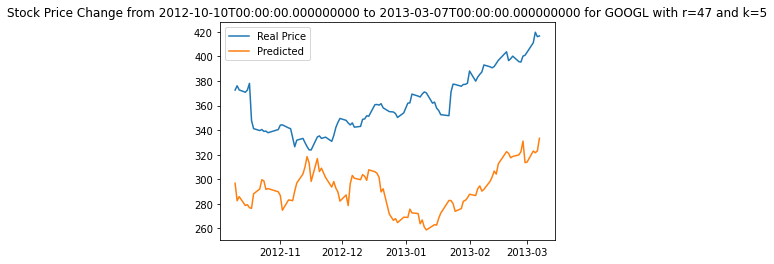

Error {'MFE': 67.49604644775391, 'MAE': 67.49604644775391, 'MSE': 5227.579269585954, 'RMSE': 72.30200045355559}
Explained Variance Score -0.15858639588338885
Profit 25.520599365234375


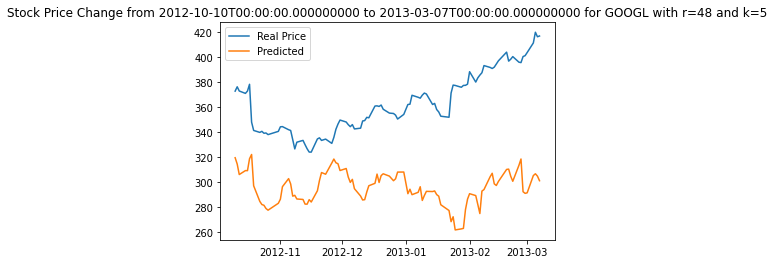

Error {'MFE': 71.34254180908204, 'MAE': 71.34254180908204, 'MSE': 6057.662644154937, 'RMSE': 77.83098768585002}
Explained Variance Score -0.6690915646115214
Profit 37.357330322265625


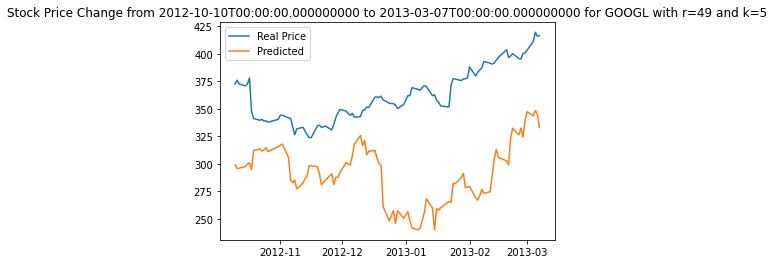

Error {'MFE': 39.621072692871095, 'MAE': 39.81786895751953, 'MSE': 2053.8761563742255, 'RMSE': 45.31971046216233}
Explained Variance Score 0.16529113952266872
Profit -9.619720458984375


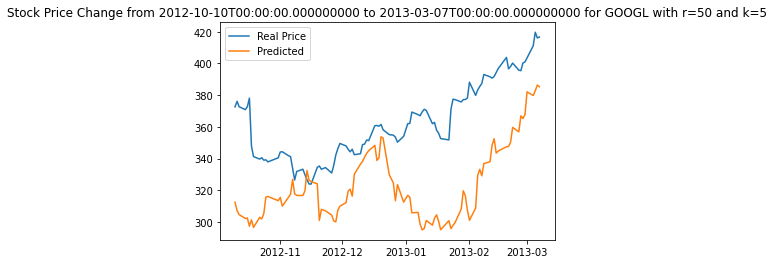

Error {'MFE': 42.14674682617188, 'MAE': 42.14674682617188, 'MSE': 2240.792002172619, 'RMSE': 47.33700457541245}
Explained Variance Score 0.19909534348577096
Profit 46.82183837890625


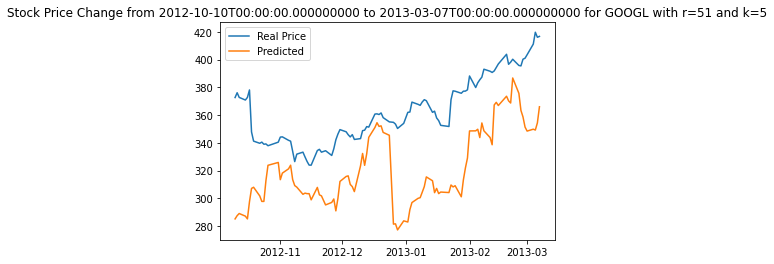

Error {'MFE': 58.82232330322265, 'MAE': 58.82232330322265, 'MSE': 4037.805605887668, 'RMSE': 63.54372987075647}
Explained Variance Score 0.003723095360372297
Profit 20.6455078125


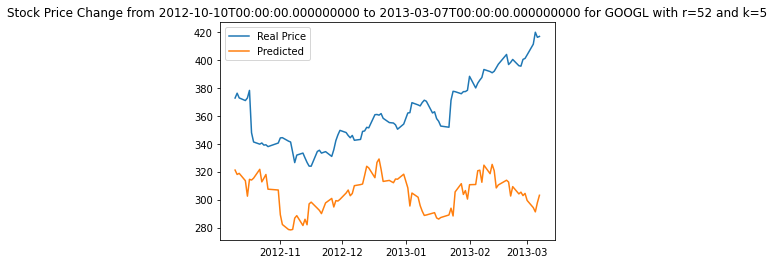

Error {'MFE': 62.00245239257813, 'MAE': 62.00245239257813, 'MSE': 4429.021485413555, 'RMSE': 66.55089394901886}
Explained Variance Score -0.008309166725868788
Profit -5.280364990234375


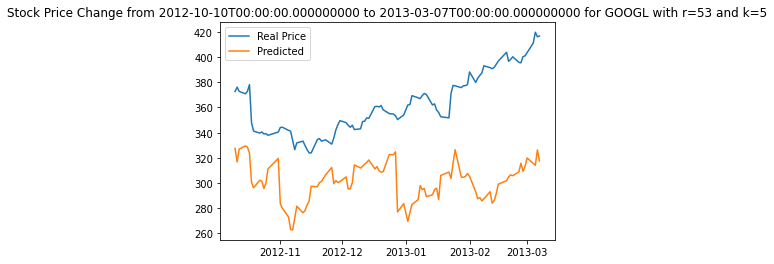

Error {'MFE': 76.86401245117187, 'MAE': 76.86401245117187, 'MSE': 7122.003617469245, 'RMSE': 84.39196417591693}
Explained Variance Score -1.0933428133115424
Profit -11.2962646484375


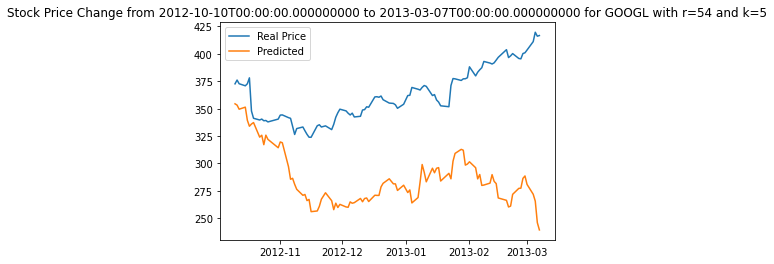

Error {'MFE': 55.904556579589844, 'MAE': 55.904556579589844, 'MSE': 3377.1485657246503, 'RMSE': 58.11323916049294}
Explained Variance Score 0.5657361709989317
Profit 51.9520263671875


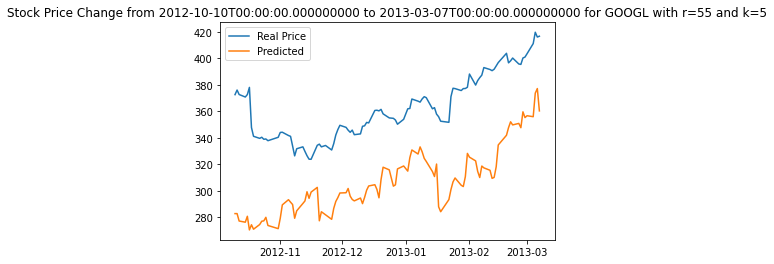

Error {'MFE': 67.8214208984375, 'MAE': 67.8214208984375, 'MSE': 5156.954557698518, 'RMSE': 71.81193882425482}
Explained Variance Score 0.03912661461173905
Profit 12.968048095703125


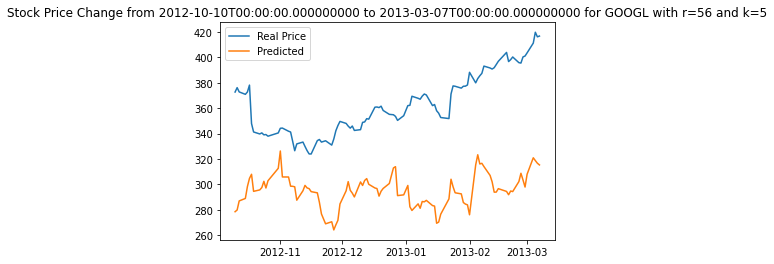

Error {'MFE': 44.14509033203125, 'MAE': 53.73017578125, 'MSE': 3519.157114791954, 'RMSE': 59.322484057833876}
Explained Variance Score -1.7080032365161508
Profit 8.02301025390625


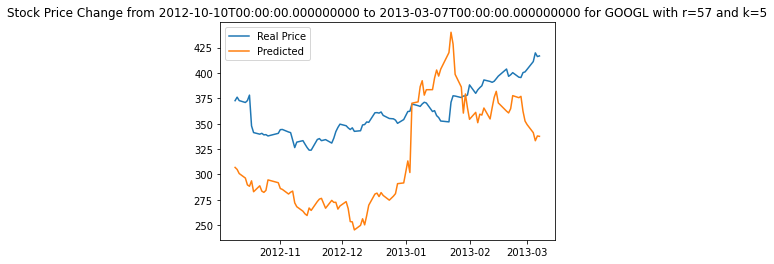

Error {'MFE': 49.31771820068359, 'MAE': 49.31771820068359, 'MSE': 3301.2237675081287, 'RMSE': 57.45627700702621}
Explained Variance Score -0.49851367187807916
Profit 11.466400146484375


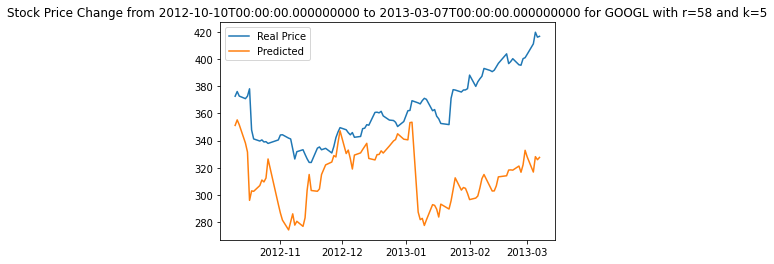

Error {'MFE': 85.0078044128418, 'MAE': 85.0078044128418, 'MSE': 7933.55971053371, 'RMSE': 89.07053222325389}
Explained Variance Score -0.219579640681127
Profit -24.83489990234375


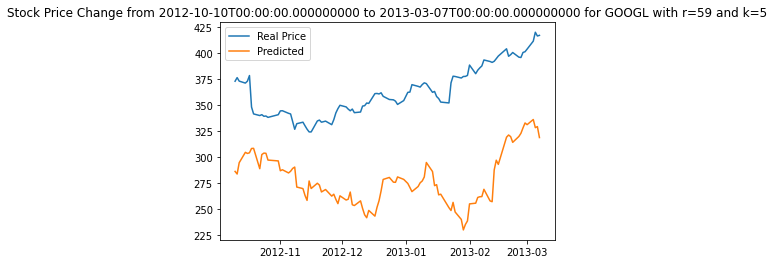

Error {'MFE': 46.84849822998047, 'MAE': 47.80555511474609, 'MSE': 3083.8224276223314, 'RMSE': 55.5321747064018}
Explained Variance Score -0.533095910305136
Profit 36.62164306640625


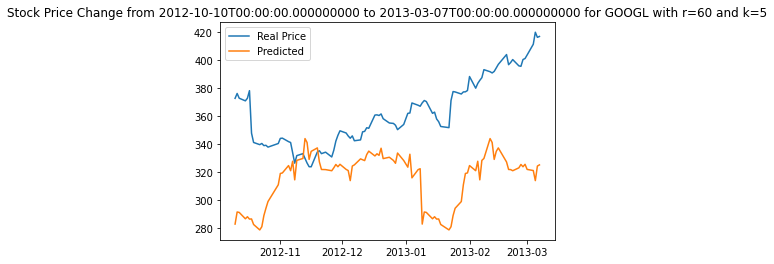

Error {'MFE': 87.05850601196289, 'MAE': 87.05850601196289, 'MSE': 8496.504217996908, 'RMSE': 92.1764840835064}
Explained Variance Score -0.5818632168998565
Profit 0.00994873046875


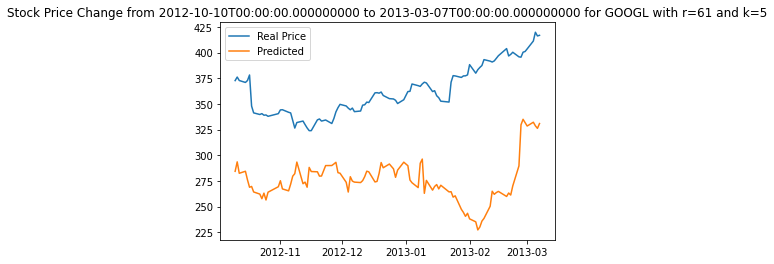

Error {'MFE': 51.44679748535156, 'MAE': 52.01486633300781, 'MSE': 3657.492766877599, 'RMSE': 60.47720865646495}
Explained Variance Score -0.7429241284595278
Profit 5.63067626953125


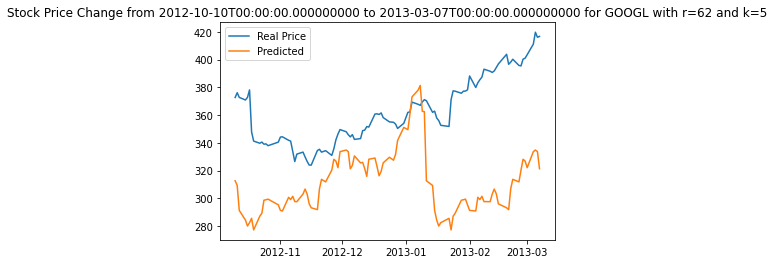

Error {'MFE': 55.97602310180664, 'MAE': 56.123170623779295, 'MSE': 3772.399631829632, 'RMSE': 61.419863495693576}
Explained Variance Score -0.10206186439629472
Profit 49.589630126953125


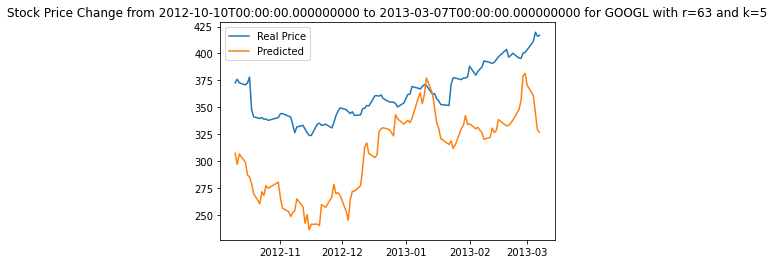

Error {'MFE': 33.25700592041016, 'MAE': 36.797747497558596, 'MSE': 2539.710065579256, 'RMSE': 50.39553616719695}
Explained Variance Score -1.472295787925575
Profit -14.124053955078125


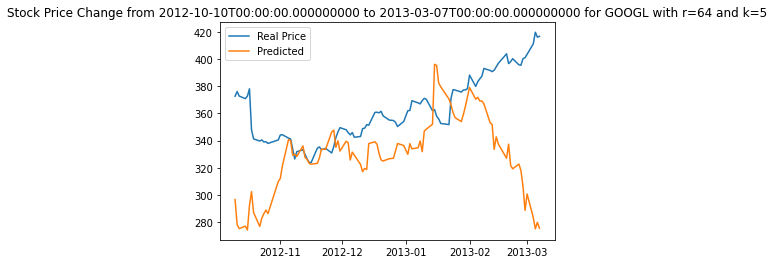

Error {'MFE': 69.8161149597168, 'MAE': 69.99158920288086, 'MSE': 5672.066786359816, 'RMSE': 75.31312492759689}
Explained Variance Score -0.37571716380610765
Profit 62.79278564453125


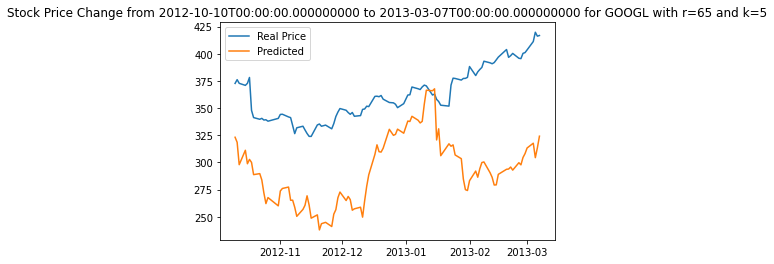

Error {'MFE': 35.90980880737305, 'MAE': 36.82662399291992, 'MSE': 2059.413552091003, 'RMSE': 45.38076191615785}
Explained Variance Score -0.3276437936154575
Profit 45.420379638671875


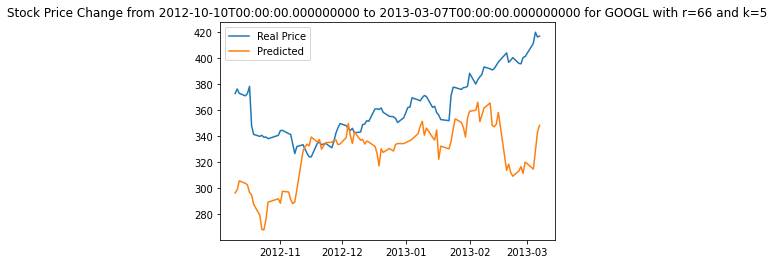

Error {'MFE': 85.42417343139648, 'MAE': 85.42417343139648, 'MSE': 7812.085133110152, 'RMSE': 88.38600077563274}
Explained Variance Score 0.11226642898621841
Profit 50.014984130859375


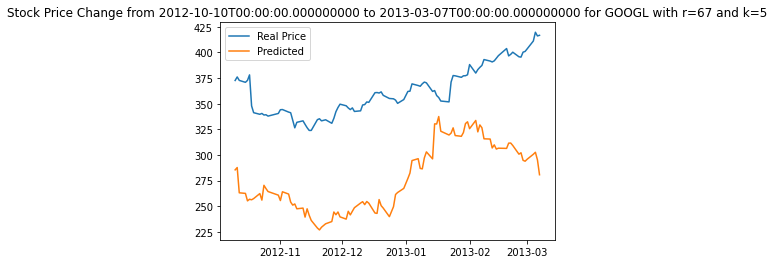

Error {'MFE': 63.914365692138674, 'MAE': 63.914365692138674, 'MSE': 5622.752001801657, 'RMSE': 74.98501184771298}
Explained Variance Score -1.6516791875204375
Profit -4.25439453125


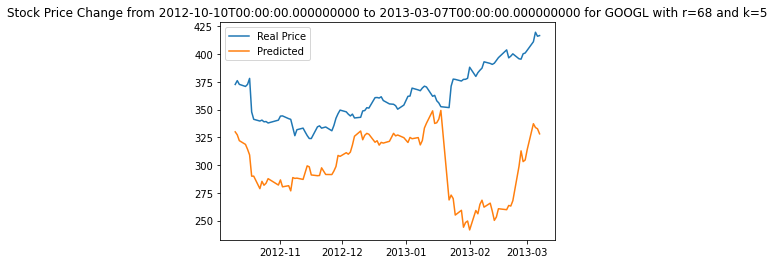

Error {'MFE': 80.35675537109375, 'MAE': 80.35675537109375, 'MSE': 7954.816067488585, 'RMSE': 89.18977557707265}
Explained Variance Score -1.5825327796934614
Profit -35.145172119140625


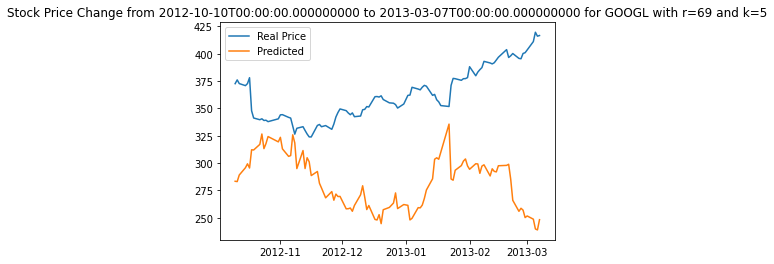

Error {'MFE': 110.21716415405274, 'MAE': 111.28403121948242, 'MSE': 15291.254051589982, 'RMSE': 123.65781031374436}
Explained Variance Score -4.420653056536886
Profit 31.241180419921875


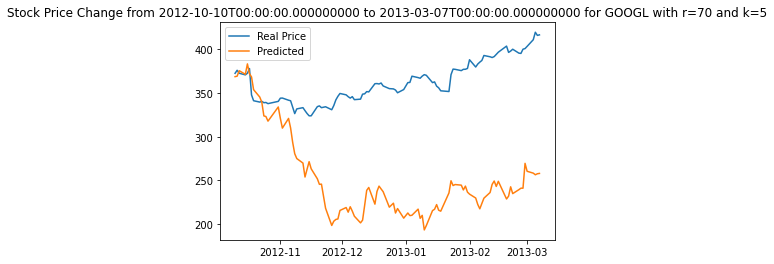

Error {'MFE': 80.43823593139649, 'MAE': 80.43823593139649, 'MSE': 8285.399598285461, 'RMSE': 91.02417040701586}
Explained Variance Score -2.1300107306137743
Profit 44.39434814453125


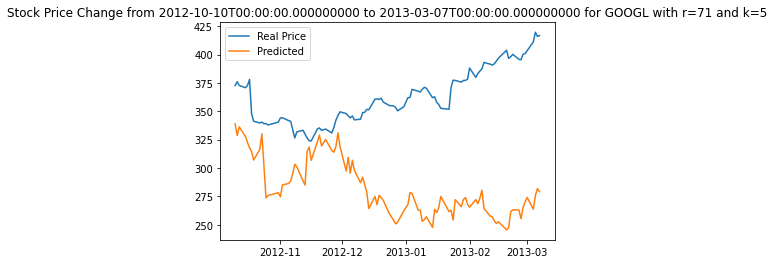

Error {'MFE': 63.597296447753905, 'MAE': 63.597296447753905, 'MSE': 5068.461525861314, 'RMSE': 71.19312836124926}
Explained Variance Score -0.7655584443422094
Profit -6.52166748046875


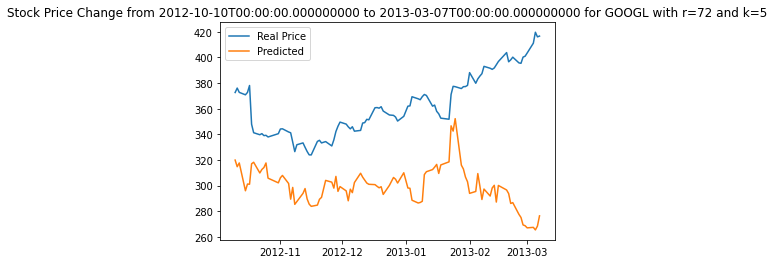

Error {'MFE': 53.39459381103516, 'MAE': 53.90610565185547, 'MSE': 4660.236169313425, 'RMSE': 68.26592245999042}
Explained Variance Score -2.1199464290573755
Profit 17.502471923828125


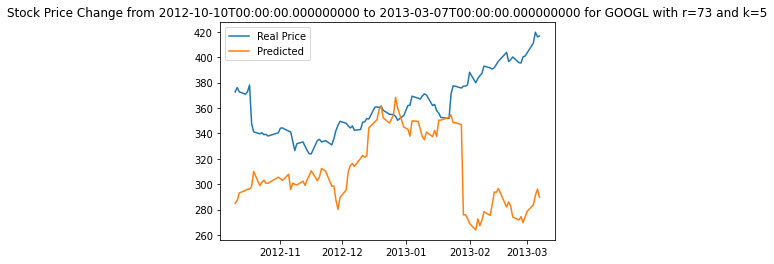

Error {'MFE': 60.58983795166016, 'MAE': 65.85020141601562, 'MSE': 6786.019758720864, 'RMSE': 82.37730123475073}
Explained Variance Score -4.37143847547868
Profit 54.494598388671875


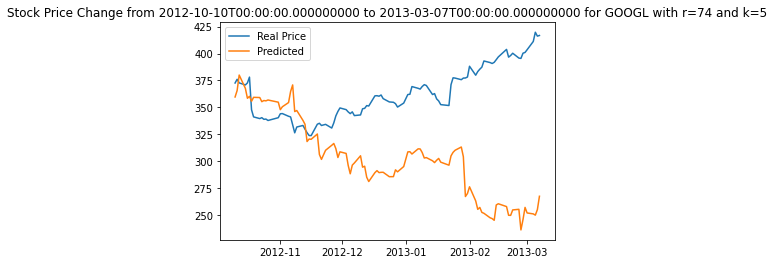

Error {'MFE': 89.9606103515625, 'MAE': 89.9606103515625, 'MSE': 8830.901649128054, 'RMSE': 93.97287719937096}
Explained Variance Score -0.27261877309037574
Profit 53.68377685546875


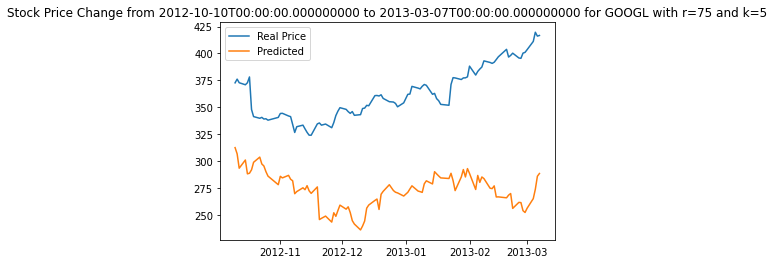

Error {'MFE': 75.82762802124023, 'MAE': 75.82762802124023, 'MSE': 6140.69533353124, 'RMSE': 78.36258886440162}
Explained Variance Score 0.3259753413182097
Profit 52.837921142578125


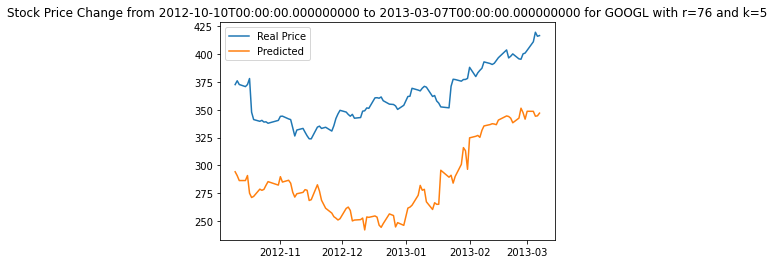

Error {'MFE': 79.97957809448242, 'MAE': 79.97957809448242, 'MSE': 6649.827726252202, 'RMSE': 81.54647586654008}
Explained Variance Score 0.5635535582994582
Profit -30.310272216796875


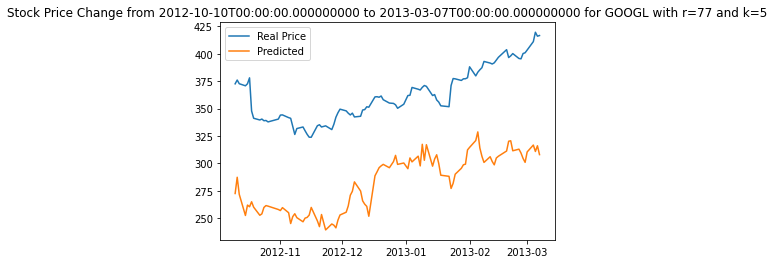

Error {'MFE': 81.18783782958984, 'MAE': 81.18783782958984, 'MSE': 7290.617763913917, 'RMSE': 85.38511441647142}
Explained Variance Score -0.2056459241528623
Profit 79.11407470703125


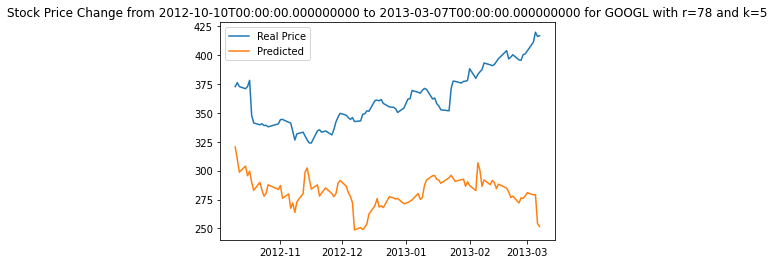

Error {'MFE': 56.53913696289062, 'MAE': 58.898798828125, 'MSE': 4567.80202440152, 'RMSE': 67.58551638037191}
Explained Variance Score -1.3644259398432728
Profit 53.393218994140625


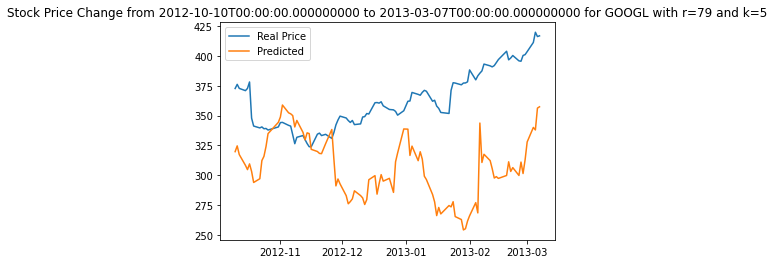

Error {'MFE': 88.87427413940429, 'MAE': 88.94924942016601, 'MSE': 12363.057046854587, 'RMSE': 111.1892847663595}
Explained Variance Score -6.698618494813356
Profit 10.550628662109375


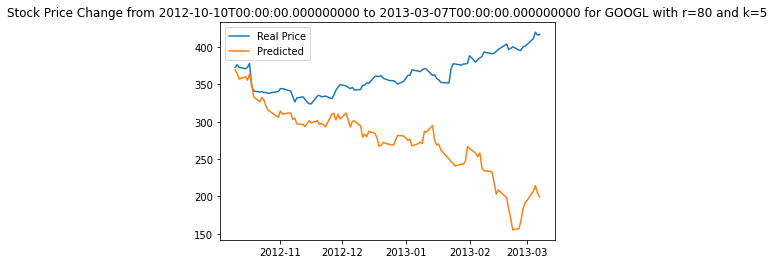

Error {'MFE': 55.71486389160156, 'MAE': 56.23628540039063, 'MSE': 4117.796781901606, 'RMSE': 64.17006141419537}
Explained Variance Score -0.7479783336539874
Profit 30.1099853515625


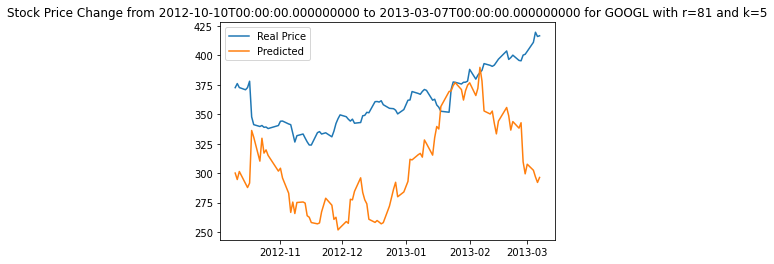

Error {'MFE': 71.40515487670899, 'MAE': 71.40515487670899, 'MSE': 6209.821747609393, 'RMSE': 78.80242221917669}
Explained Variance Score -0.9160677716368582
Profit 50.710662841796875


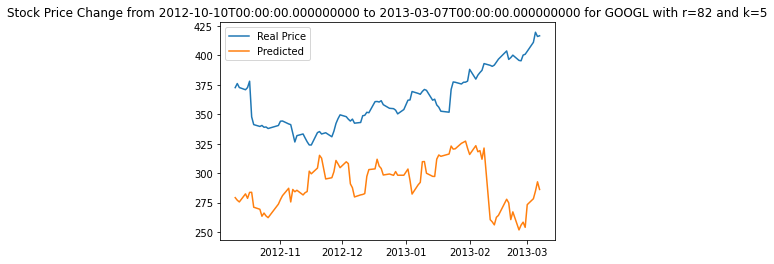

Error {'MFE': 33.41761520385742, 'MAE': 44.74083969116211, 'MSE': 2825.8410796809917, 'RMSE': 53.1586406869193}
Explained Variance Score -1.94724486632032
Profit 52.732757568359375


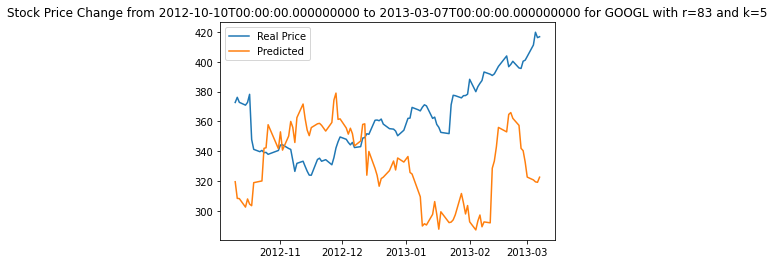

Error {'MFE': 94.24379318237305, 'MAE': 94.24379318237305, 'MSE': 9224.794463122927, 'RMSE': 96.04579357328944}
Explained Variance Score 0.408686744951287
Profit 30.62060546875


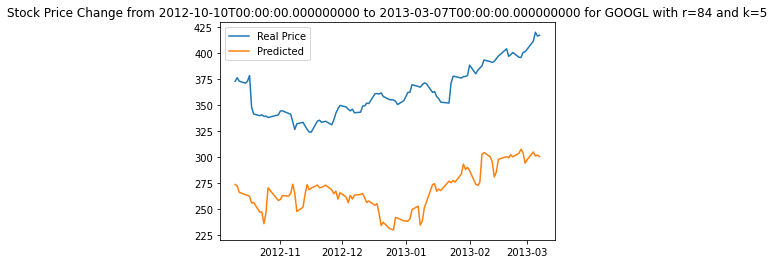

Error {'MFE': 57.371119842529296, 'MAE': 57.371119842529296, 'MSE': 4272.266146149288, 'RMSE': 65.36257450674115}
Explained Variance Score -0.6913650706569807
Profit 29.164093017578125


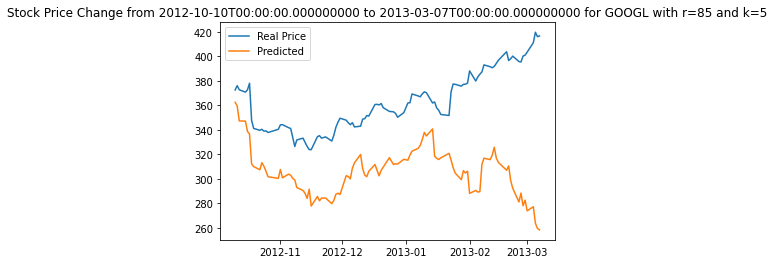

Error {'MFE': 76.3199185180664, 'MAE': 77.62662506103516, 'MSE': 8023.896381724509, 'RMSE': 89.57620432751384}
Explained Variance Score -2.7923272423351895
Profit 51.496429443359375


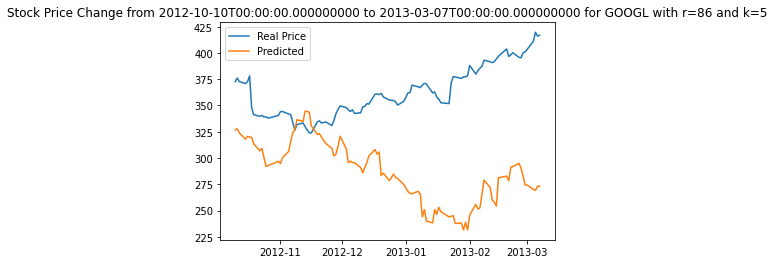

Error {'MFE': 34.35280014038086, 'MAE': 44.08943649291992, 'MSE': 2633.645499986948, 'RMSE': 51.319055914805645}
Explained Variance Score -1.5065241672287604
Profit -26.411468505859375


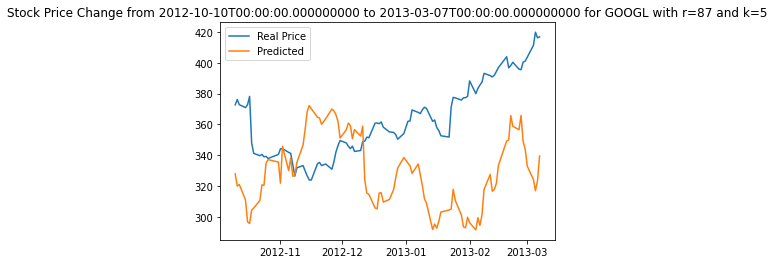

Error {'MFE': 50.24419494628906, 'MAE': 50.28603637695313, 'MSE': 3720.6848450912767, 'RMSE': 60.99741670834329}
Explained Variance Score -1.0627831969704347
Profit 0.39031982421875


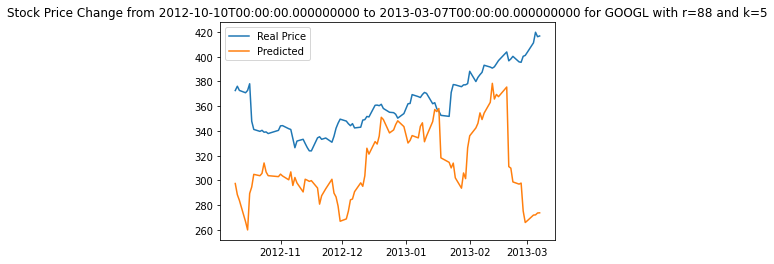

Error {'MFE': 77.77227142333984, 'MAE': 77.77227142333984, 'MSE': 6413.28163704623, 'RMSE': 80.08296720930257}
Explained Variance Score 0.37100168510292497
Profit 65.68557739257812


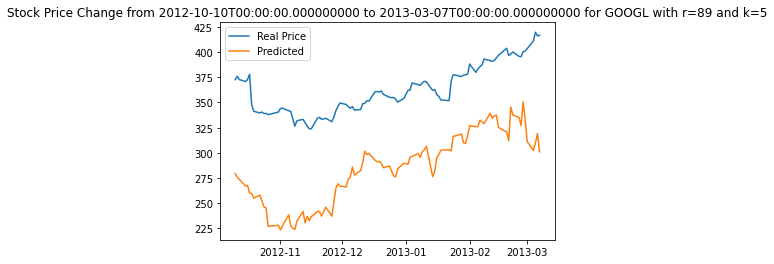

Error {'MFE': 84.93988922119141, 'MAE': 84.93988922119141, 'MSE': 8953.850497390982, 'RMSE': 94.62478796484028}
Explained Variance Score -1.9989118765586462
Profit -29.04901123046875


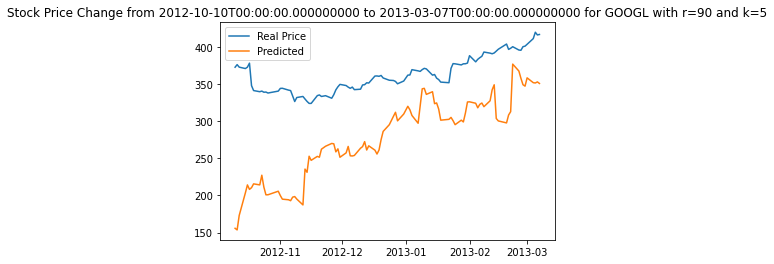

Error {'MFE': 88.96801742553711, 'MAE': 88.96801742553711, 'MSE': 10106.638868444568, 'RMSE': 100.53178039030527}
Explained Variance Score -2.7788151021588505
Profit 82.3072509765625


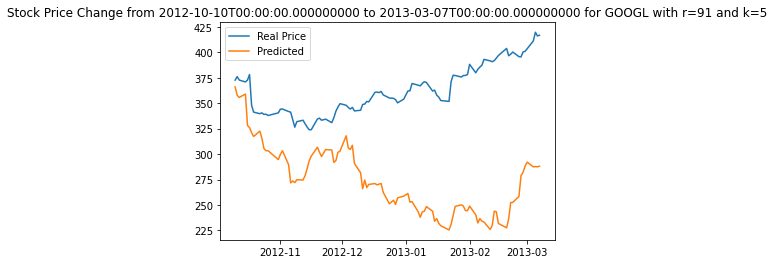

Error {'MFE': 32.95300308227539, 'MAE': 41.727379913330076, 'MSE': 2501.2833322274846, 'RMSE': 50.01283167575582}
Explained Variance Score -1.4407408004753535
Profit 35.100128173828125


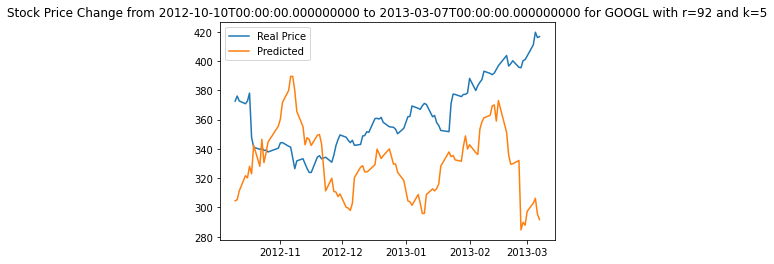

Error {'MFE': 34.83698455810547, 'MAE': 46.41696746826172, 'MSE': 2811.8027369822653, 'RMSE': 53.026434322724974}
Explained Variance Score -1.7559756144992478
Profit 59.454376220703125


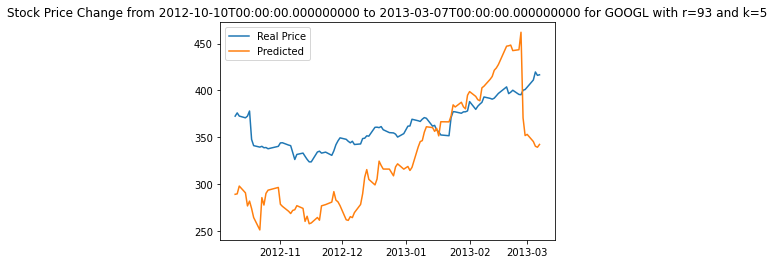

Error {'MFE': 82.52537368774414, 'MAE': 82.52537368774414, 'MSE': 7303.198386642721, 'RMSE': 85.45875254555686}
Explained Variance Score 0.15026381457014082
Profit 17.47247314453125


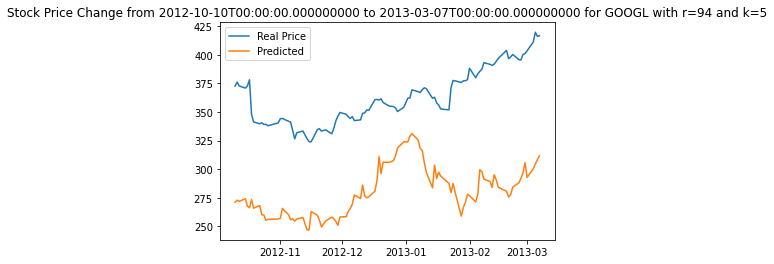

Error {'MFE': 81.38903747558594, 'MAE': 81.38903747558594, 'MSE': 7719.8564792573125, 'RMSE': 87.86271381682512}
Explained Variance Score -0.88943460087702
Profit 36.531585693359375


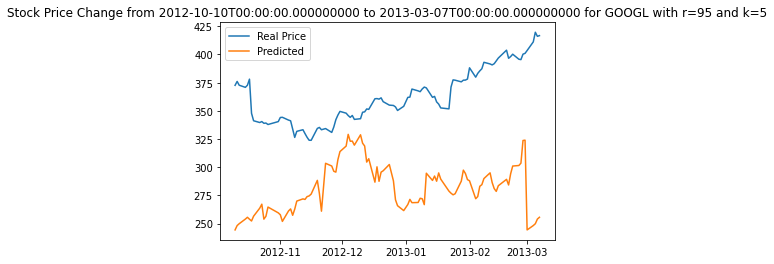

Error {'MFE': 63.72257263183594, 'MAE': 63.99304382324219, 'MSE': 4727.54891370818, 'RMSE': 68.7571735436251}
Explained Variance Score -0.15017056241772875
Profit 14.44451904296875


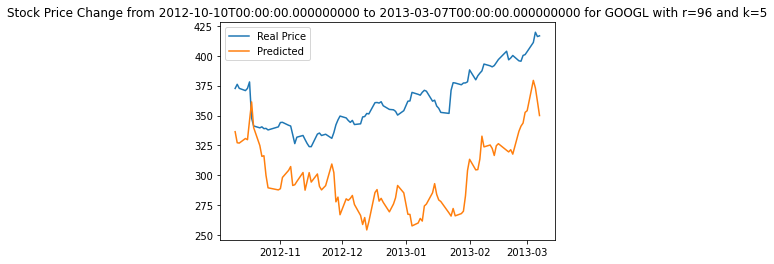

Error {'MFE': 111.72802825927734, 'MAE': 111.72802825927734, 'MSE': 14512.918680767472, 'RMSE': 120.46957574743705}
Explained Variance Score -2.500207296429963
Profit 30.540618896484375


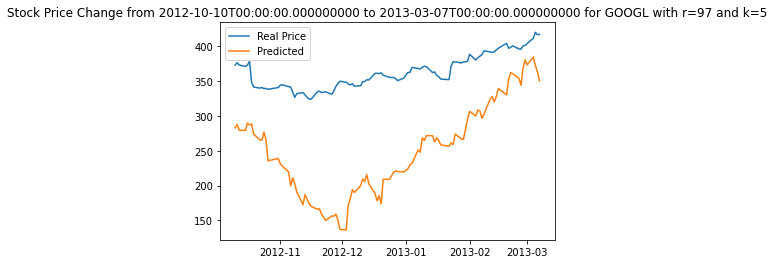

Error {'MFE': 37.922020263671875, 'MAE': 41.75975799560547, 'MSE': 2436.989469609475, 'RMSE': 49.365873532324684}
Explained Variance Score -0.7225586017703416
Profit 11.11126708984375


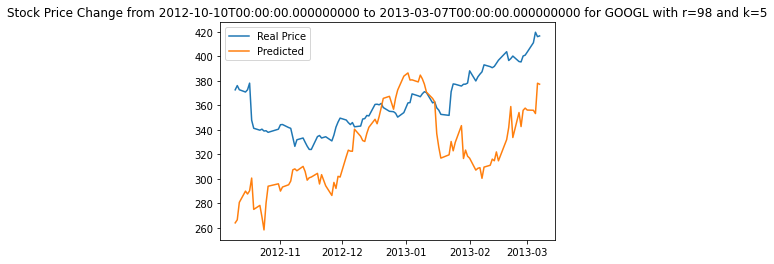

Error {'MFE': 87.21906723022461, 'MAE': 87.21906723022461, 'MSE': 8373.86914473111, 'RMSE': 91.50884735767963}
Explained Variance Score -0.32213295844222034
Profit 64.229248046875


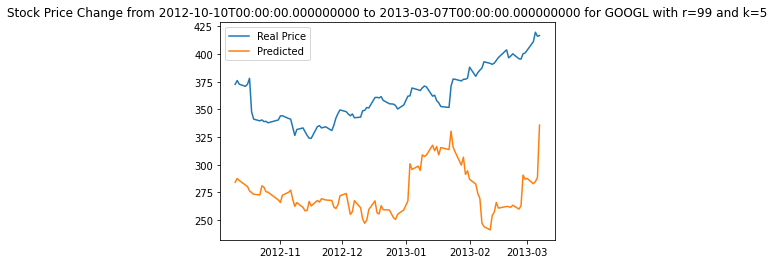

In [3]:
stock_name = 'GOOGL'
num_points_to_predict = 100 #days
number_of_neighbors = 5
weighted = False
history = get_data(stock_name)
close_price = history['Close']
num_train = int(len(close_price.values)/2)
train_data_1d = close_price.values[:num_train]
real = close_price.values[num_train:num_train+num_points_to_predict]
dates = history.index.to_series().values[num_train:num_train+num_points_to_predict]

for r in range(1, 100, 1):
    predicted = get_predictions(train_data_1d, number_of_neighbors, num_points_to_predict, r)
    print('Error', calculate_error(real, predicted))
    print('Explained Variance Score', explained_variance(real, predicted))
    print('Profit', compute_profit(real, predicted))
    plot_real_predicted(real, predicted, dates, r, number_of_neighbors, stock_name)